# HR Analytics Project- Understanding the Attrition in HR

In [70]:
#importing the required libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [6]:
df=pd.read_csv (r'C:\Users\Chinmay\Downloads\attrition.csv')

In [8]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [22]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [24]:
df.shape

(1470, 35)

In [25]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [26]:
df.duplicated().sum()

0

In [27]:
for column in df.columns:
    if df[column].dtype==object:
        print("{}:{}".format(column,df[column].unique()))


Attrition:['Yes' 'No']
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department:['Sales' 'Research & Development' 'Human Resources']
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender:['Female' 'Male']
JobRole:['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus:['Single' 'Married' 'Divorced']
Over18:['Y']
OverTime:['Yes' 'No']


In [29]:
for column in df.columns:
    if df[column].dtype!=object:
        print("{}:{}:{}".format(column,df[column].min(),df[column].max()))

Age:18:60
DailyRate:102:1499
DistanceFromHome:1:29
Education:1:5
EmployeeCount:1:1
EmployeeNumber:1:2068
EnvironmentSatisfaction:1:4
HourlyRate:30:100
JobInvolvement:1:4
JobLevel:1:5
JobSatisfaction:1:4
MonthlyIncome:1009:19999
MonthlyRate:2094:26999
NumCompaniesWorked:0:9
PercentSalaryHike:11:25
PerformanceRating:3:4
RelationshipSatisfaction:1:4
StandardHours:80:80
StockOptionLevel:0:3
TotalWorkingYears:0:40
TrainingTimesLastYear:0:6
WorkLifeBalance:1:4
YearsAtCompany:0:40
YearsInCurrentRole:0:18
YearsSinceLastPromotion:0:15
YearsWithCurrManager:0:17


In [30]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [32]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [36]:
df.drop(['Over18','EmployeeCount','EmployeeNumber','StandardHours'],axis=1,inplace=True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [37]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Data Visualisation

<AxesSubplot:xlabel='Attrition', ylabel='count'>

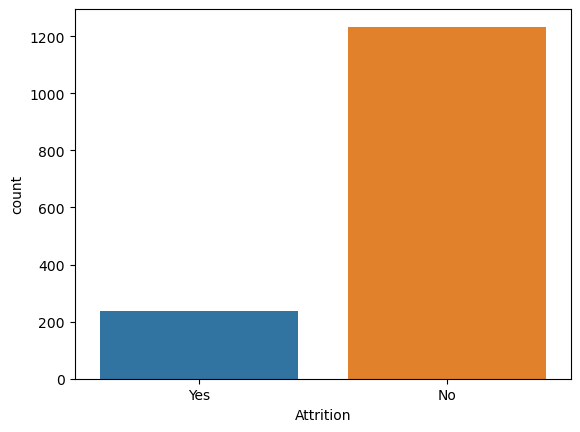

In [38]:
sns.countplot (x=df['Attrition'])

In [39]:
numeric_col=list(df.select_dtypes(include=np.number).columns)
categorical_col=list(df.select_dtypes(include=object).columns)

In [40]:
numeric_col

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

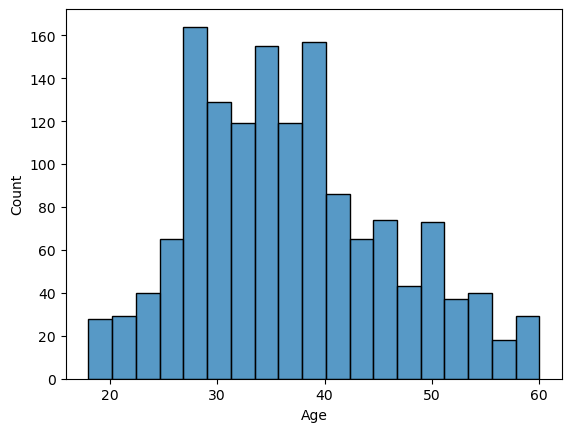

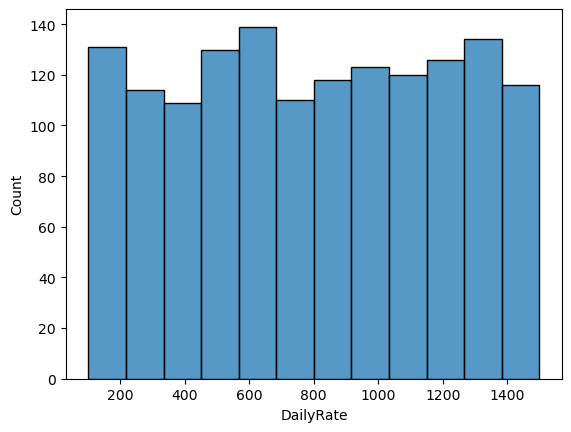

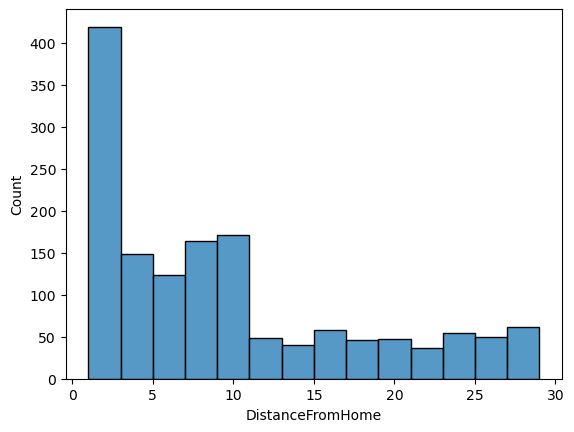

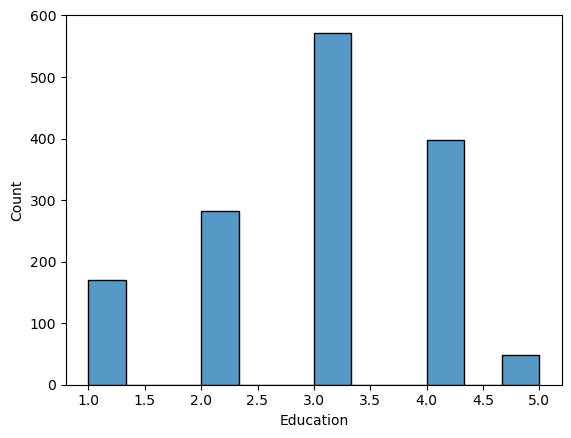

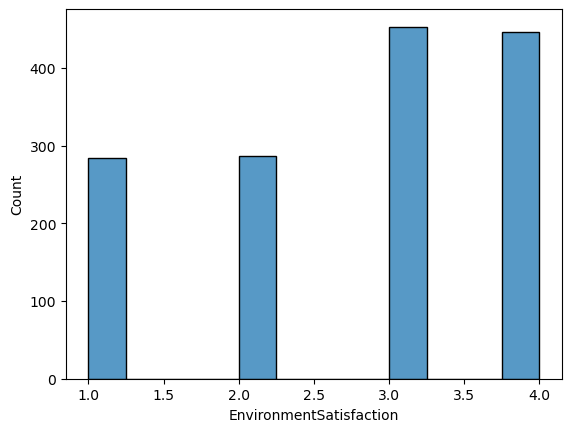

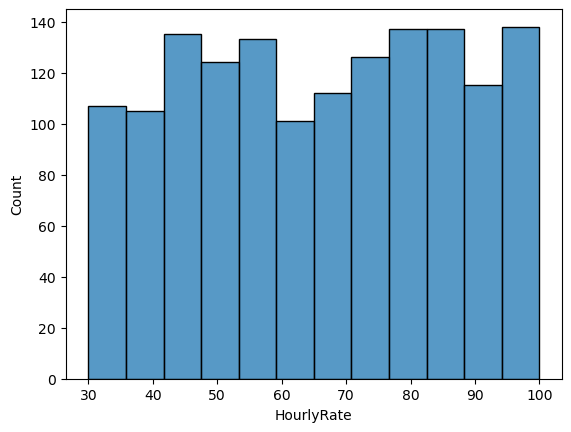

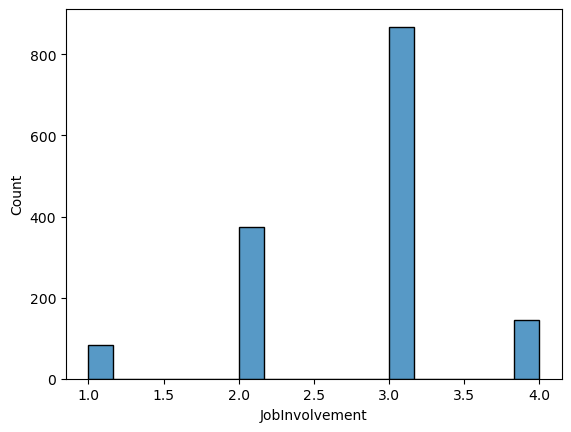

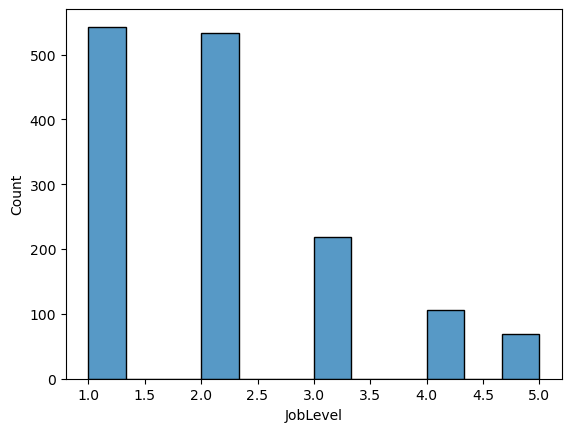

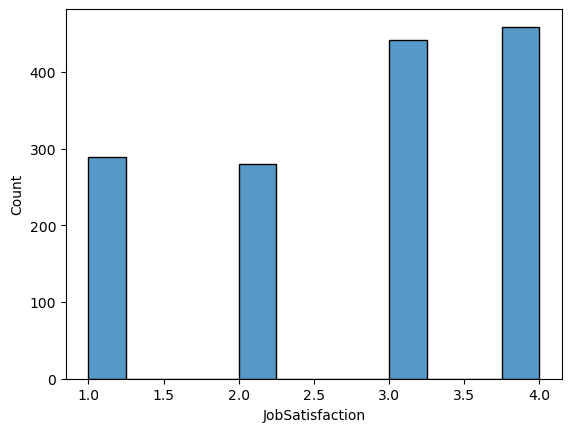

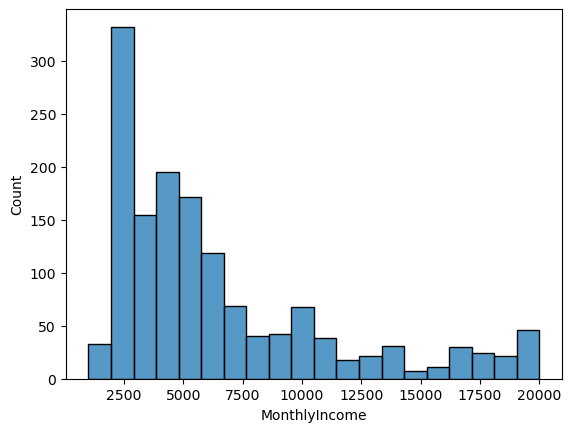

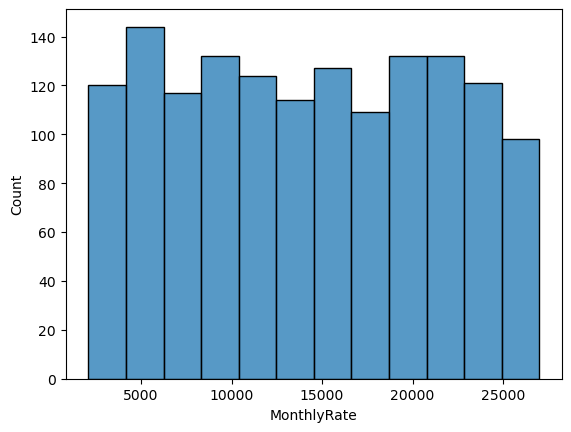

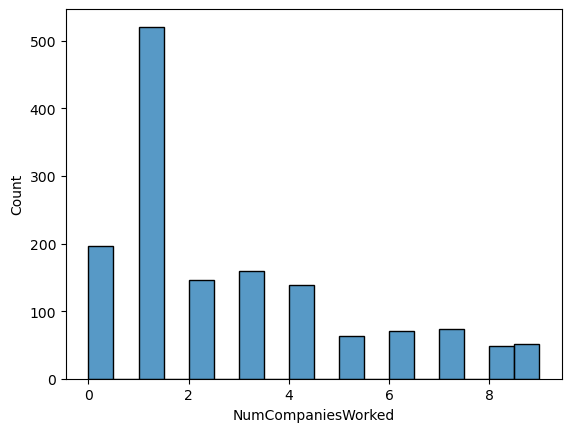

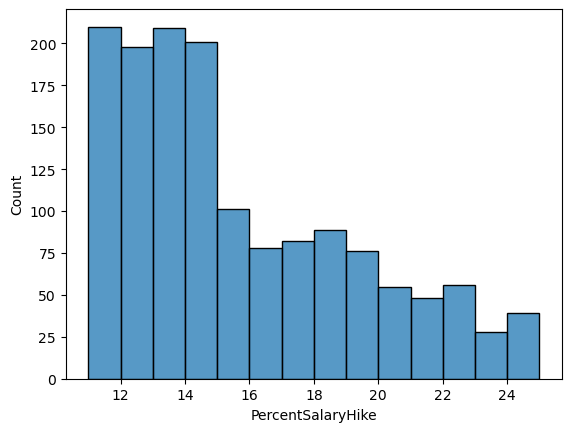

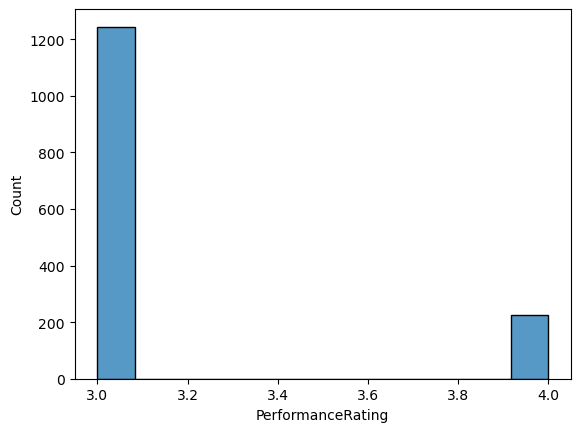

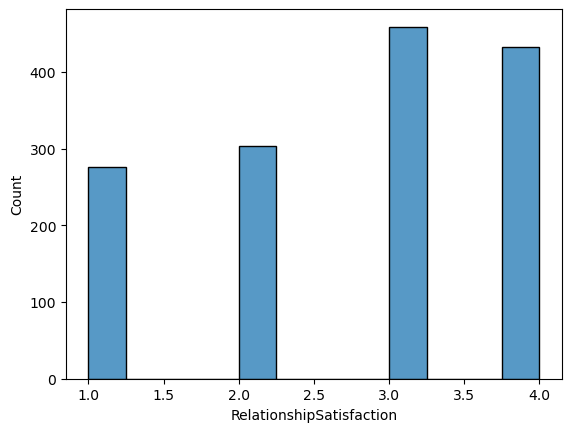

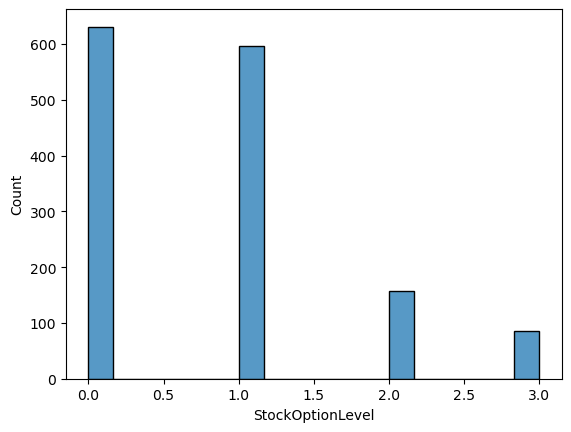

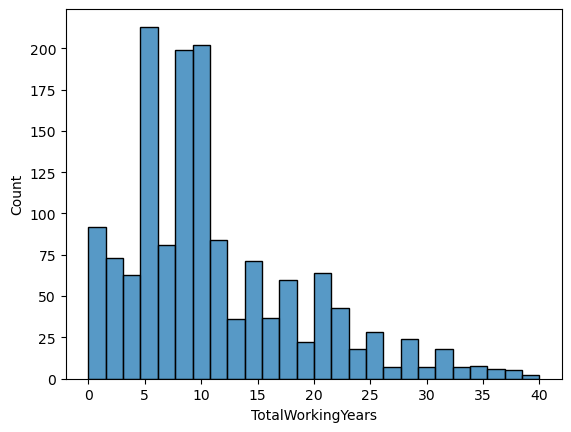

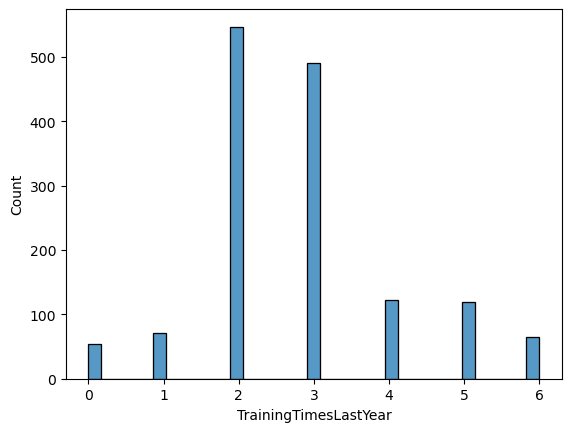

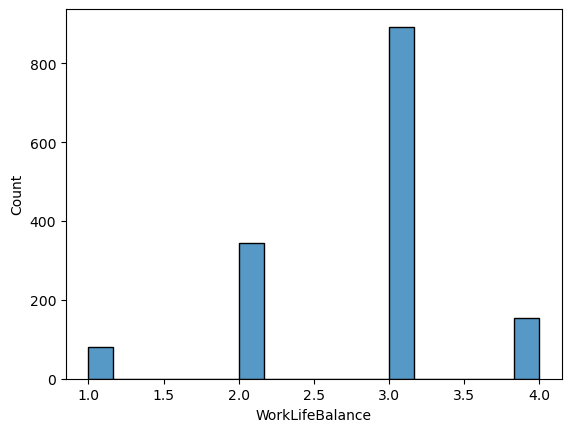

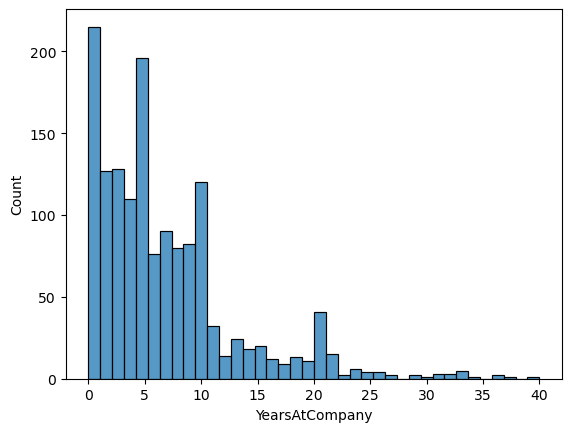

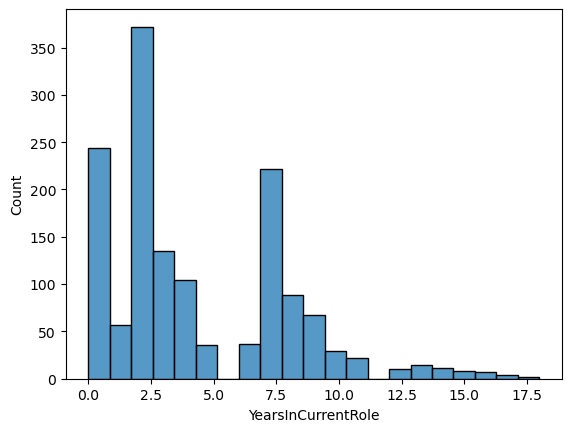

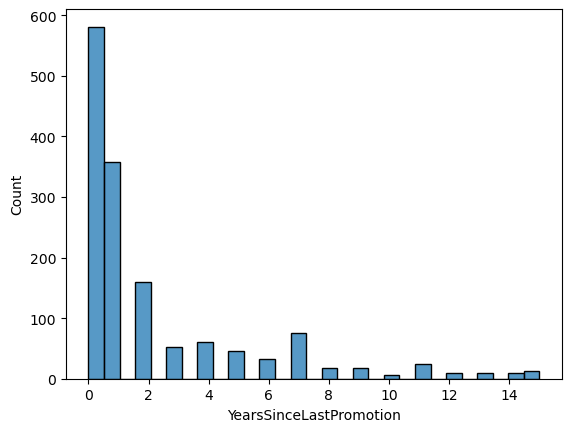

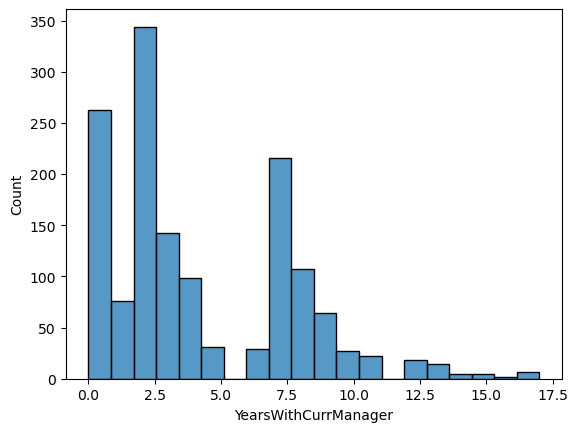

In [41]:
for col in numeric_col:
    sns.histplot(x=df[col])
    plt.show()

In [42]:
df.groupby('Gender')['Attrition'].value_counts()

Gender  Attrition
Female  No           501
        Yes           87
Male    No           732
        Yes          150
Name: Attrition, dtype: int64

In [43]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [45]:
df.groupby('JobRole')['Attrition'].value_counts(normalize=True)

JobRole                    Attrition
Healthcare Representative  No           0.931298
                           Yes          0.068702
Human Resources            No           0.769231
                           Yes          0.230769
Laboratory Technician      No           0.760618
                           Yes          0.239382
Manager                    No           0.950980
                           Yes          0.049020
Manufacturing Director     No           0.931034
                           Yes          0.068966
Research Director          No           0.975000
                           Yes          0.025000
Research Scientist         No           0.839041
                           Yes          0.160959
Sales Executive            No           0.825153
                           Yes          0.174847
Sales Representative       No           0.602410
                           Yes          0.397590
Name: Attrition, dtype: float64

In [47]:
df.groupby('JobRole')['MonthlyIncome'].mean()

JobRole
Healthcare Representative     7528.763359
Human Resources               4235.750000
Laboratory Technician         3237.169884
Manager                      17181.676471
Manufacturing Director        7295.137931
Research Director            16033.550000
Research Scientist            3239.972603
Sales Executive               6924.279141
Sales Representative          2626.000000
Name: MonthlyIncome, dtype: float64

In [48]:
df.groupby('Department')['Attrition'].value_counts(normalize=True)

Department              Attrition
Human Resources         No           0.809524
                        Yes          0.190476
Research & Development  No           0.861602
                        Yes          0.138398
Sales                   No           0.793722
                        Yes          0.206278
Name: Attrition, dtype: float64

In [49]:
df.groupby('MonthlyIncome')['Attrition'].value_counts(normalize=True)

MonthlyIncome  Attrition
1009           Yes          1.0
1051           No           1.0
1052           No           1.0
1081           Yes          1.0
1091           Yes          1.0
                           ... 
19859          Yes          1.0
19926          No           1.0
19943          No           1.0
19973          No           1.0
19999          No           1.0
Name: Attrition, Length: 1388, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

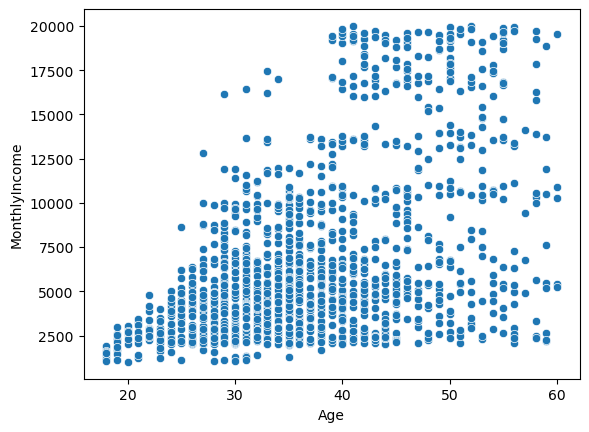

In [50]:
sns.scatterplot(data=df,x='Age',y='MonthlyIncome')

In [51]:
x=df.loc[:,df.columns!='Attrition']
y=df['Attrition']

In [52]:
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,...,3,4,0,17,3,2,9,6,0,8


In [53]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

Building the Machine Learning Model

In [54]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression

In [55]:
label_encoder=LabelEncoder()
y=label_encoder.fit_transform(y)
y

array([1, 0, 1, ..., 0, 0, 0])

Label Encoding for Target Attrition

In [57]:
x=pd.get_dummies(x,drop_first=True)
x

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,5993,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,3,61,2,2,2,5130,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,92,2,1,3,2090,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,4,56,3,1,3,2909,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,40,3,1,2,3468,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,4,42,2,3,1,9991,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,2,87,4,2,2,6142,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,4,63,2,2,2,5390,...,0,0,0,0,0,1,0,1,0,0


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.3)

In [59]:
scaler=StandardScaler()
x_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_train.columns)

In [60]:
x_train.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.762337,-0.816540,1.742140,0.092884,-0.669480,0.055811,0.384204,-0.063108,-0.671766,-0.951146,...,2.128910,-0.255377,-0.335309,-0.255377,-0.495745,-0.533521,-0.23763,1.088445,-0.690165,-0.624932
1,0.326292,1.652087,1.366162,1.078220,-1.586784,-0.239963,0.384204,0.838814,1.171561,0.815643,...,-0.469724,-0.255377,-0.335309,-0.255377,-0.495745,-0.533521,-0.23763,1.088445,-0.690165,-0.624932
2,1.525416,-1.436773,-0.012423,0.092884,1.165128,0.844541,0.384204,2.642657,-0.671766,2.848090,...,-0.469724,3.915780,-0.335309,-0.255377,-0.495745,-0.533521,-0.23763,-0.918742,-0.690165,1.600173
3,0.217281,0.035051,1.240836,1.078220,1.165128,-1.225876,0.384204,-0.063108,1.171561,-0.554258,...,-0.469724,-0.255377,-0.335309,-0.255377,2.017168,-0.533521,-0.23763,-0.918742,-0.690165,-0.624932
4,-0.109753,0.180264,-1.015031,1.078220,1.165128,-1.620241,-0.998124,-0.063108,0.249897,-0.453543,...,-0.469724,-0.255377,2.982320,-0.255377,-0.495745,-0.533521,-0.23763,1.088445,-0.690165,-0.624932


In [62]:
x_test.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,-0.000742,-1.109428,0.112903,1.078220,1.165128,-0.387850,0.384204,-0.063108,-1.593430,-0.487897,...,-0.469724,-0.255377,2.982320,-0.255377,-0.495745,-0.533521,-0.237630,-0.918742,1.448930,-0.624932
1,-2.071956,-0.681171,-0.764379,-0.892452,-0.669480,0.203698,0.384204,-0.965030,1.171561,-1.052075,...,-0.469724,-0.255377,-0.335309,-0.255377,-0.495745,-0.533521,4.208217,-0.918742,1.448930,1.600173
2,-0.763821,-1.680436,1.616814,0.092884,-1.586784,-0.880807,0.384204,-0.965030,0.249897,-0.931942,...,-0.469724,-0.255377,-0.335309,-0.255377,2.017168,-0.533521,-0.237630,1.088445,-0.690165,1.600173
3,-0.327775,1.260750,0.112903,1.078220,0.247824,1.041724,0.384204,-0.965030,0.249897,-0.913164,...,-0.469724,-0.255377,-0.335309,-0.255377,-0.495745,-0.533521,4.208217,1.088445,-0.690165,1.600173
4,2.070473,1.349355,1.742140,0.092884,1.165128,0.105107,0.384204,1.740736,-0.671766,1.472854,...,-0.469724,-0.255377,2.982320,-0.255377,-0.495745,-0.533521,-0.237630,1.088445,-0.690165,1.600173


In [63]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [64]:
y_pred

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

Encoding categorical columns

In [65]:
from sklearn import metrics
metrics.confusion_matrix(y_test,y_pred)


array([[352,  12],
       [ 45,  32]], dtype=int64)

<AxesSubplot:>

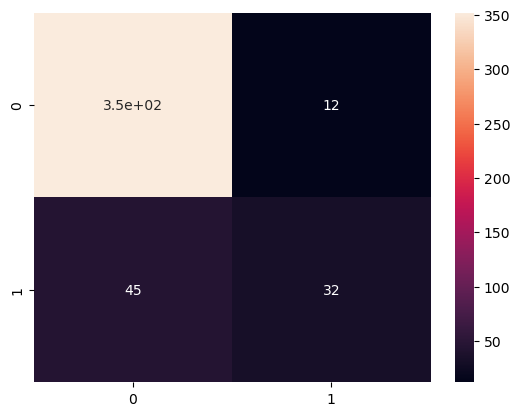

In [67]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True)

In [68]:
metrics.accuracy_score(y_test,y_pred)

0.8707482993197279

In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       364
           1       0.73      0.42      0.53        77

    accuracy                           0.87       441
   macro avg       0.81      0.69      0.73       441
weighted avg       0.86      0.87      0.86       441

